In [66]:
from fooof import FOOOF
from fooof import FOOOFGroup

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mne

# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

In [5]:
## Prep paths ##

subject = 'SLCH002'
raw_data_dir = f"/home/brooke/pacman/raw_data/{subject}"
preproc_data_dir = f"/home/brooke/pacman/preprocessing/{subject}/ieeg"

In [117]:
## Load Neural Data

# load
last_away_epochs = mne.read_epochs(f"{preproc_data_dir}/{subject}_wm_raw_clean_last_away_events.fif")

# get good epochs (for behavioral data only)
good_epochs = [i for i,x in enumerate(last_away_epochs.get_annotations_per_epoch()) if not x]
bad_epochs = [i for i,x in enumerate(last_away_epochs.get_annotations_per_epoch()) if  x]

# load behavioral data
last_away_data = pd.read_csv(f"{raw_data_dir}/behave/{subject}_last_away_events.csv")

# set info as metadata
last_away_epochs.metadata = last_away_data

# onlt good epochs
last_away_epochs = last_away_epochs[good_epochs]

Reading /home/brooke/pacman/preprocessing/SLCH002/ieeg/SLCH002_wm_raw_clean_last_away_events.fif ...
    Found the data of interest:
        t =   -5000.00 ...    5000.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_112090/1569429545.py:4: RuntimeWarning: This filename (/home/brooke/pacman/preprocessing/SLCH002/ieeg/SLCH002_wm_raw_clean_last_away_events.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  last_away_epochs = mne.read_epochs(f"{preproc_data_dir}/{subject}_wm_raw_clean_last_away_events.fif")


Not setting metadata
223 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 5 columns


In [118]:
ghost_epochs = last_away_epochs["TrialType <= 16"]
approach_data = ghost_epochs.copy().crop(-2, 2)

In [41]:
approach_data._data.shape

(131, 26, 8001)

In [57]:
example_trial = approach_data._data[11, 1, :]

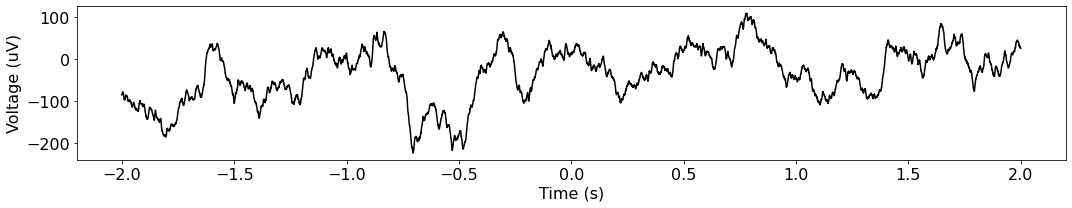

In [58]:
plot_time_series(approach_data.times, example_trial)

In [59]:
fs = 2000

# Mean of spectrogram (Welch)
freq_mean, psd_mean = compute_spectrum(example_trial, fs, method='welch', avg_type='mean', nperseg=fs*2)

# Median of spectrogram ("median Welch")
freq_med, psd_med = compute_spectrum(example_trial, fs, method='welch', avg_type='median', nperseg=fs*2)

# Median filtered spectrum
freq_mf, psd_mf = compute_spectrum(example_trial, fs, method='medfilt')

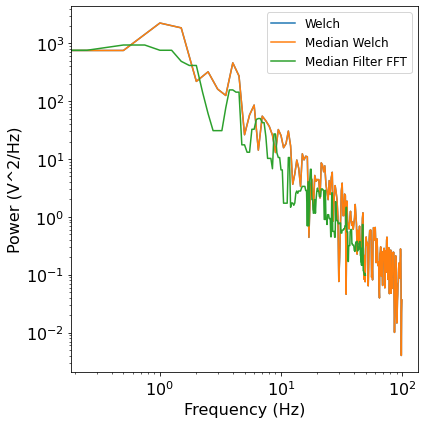

In [60]:
plot_power_spectra([freq_mean[:200], freq_med[:200], freq_mf[:200]],
                   [psd_mean[:200], psd_med[:200], psd_mf[:200]],
                   ['Welch', 'Median Welch', 'Median Filter FFT'])

In [180]:
freqs.shape

(150,)

In [182]:
psds.mean(axis = 0).shape

(150,)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 30 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

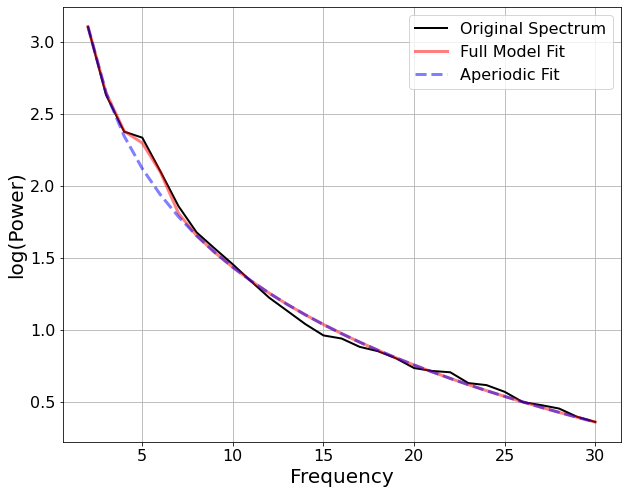

In [185]:
# Initialize a FOOOF object
fm = FOOOF(aperiodic_mode = 'knee')

# Set the frequency range to fit the model
freq_range = [2, 30]

# Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(freqs, psds.mean(axis = 0), freq_range)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 30 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

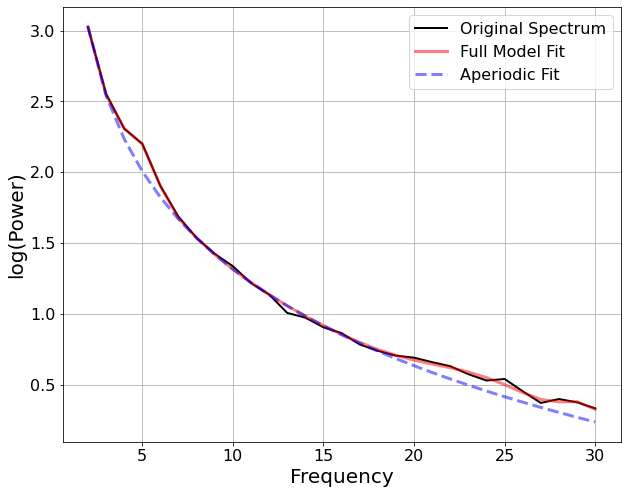

In [188]:
# Initialize a FOOOF object
fm = FOOOF(aperiodic_mode = 'knee')

# Set the frequency range to fit the model
freq_range = [2, 30]

# Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(freqs, psds.mean(axis = 0), freq_range)

In [186]:
approach_data = ghost_epochs.copy().crop(0, 2)

In [187]:
psds, freqs = mne.time_frequency.psd_array_welch(approach_data._data[:, 1, :], 2000, fmin = 1, fmax = 150, n_overlap=2000//8, n_fft=2000)

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


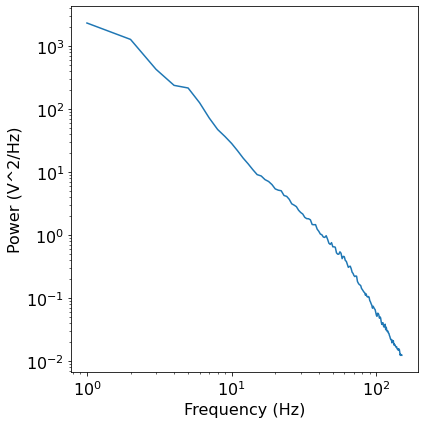

In [173]:
plot_power_spectra(freqs, np.transpose(psds.mean(axis = 0)))

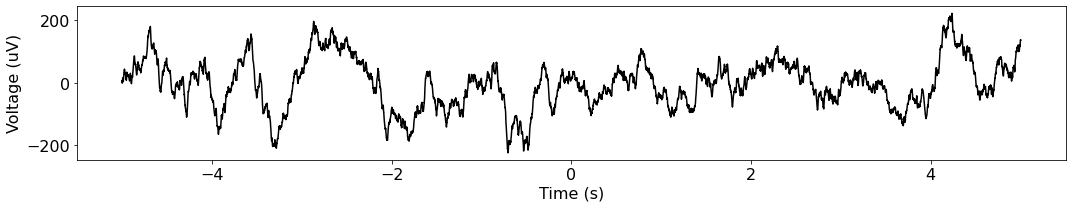

In [127]:
plot_time_series(ghost_epochs.times, ghost_epochs._data[11, 1, :])

In [159]:
# Initialize a FOOOFGroup object, with desired settings
fg = FOOOFGroup(peak_width_limits=[1, 3], min_peak_height=0.15,
                peak_threshold=2., max_n_peaks=6, verbose=False)

# Define the frequency range to fit
freq_range = [1, 100]

In [176]:
psds.mean(axis = 0).shape

(150,)

In [177]:
freqs

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150.])

In [175]:
fg.report(freqs, psds.mean(axis = 0), freq_range)

DataError: Inputs are not the right dimensions.

In [149]:
print(fg.group_results[0:2])

[FOOOFResults(aperiodic_params=array([3.29432636, 2.2195852 ]), peak_params=array([[14.94836957,  0.44282992,  3.        ],
       [26.96081909,  0.47169729,  3.        ],
       [32.71920209,  0.6074258 ,  2.97479331],
       [40.65895792,  0.68626828,  2.69613811],
       [45.82031585,  0.61916214,  3.        ],
       [51.40317196,  0.72427316,  3.        ]]), r_squared=0.9707991026813668, error=0.12479772394495274, gaussian_params=array([[14.94836957,  0.44309232,  1.5       ],
       [26.96081909,  0.48068373,  1.5       ],
       [32.71920209,  0.66140959,  1.48739665],
       [40.65895792,  0.77291848,  1.34806905],
       [45.82031585,  0.71390943,  1.5       ],
       [51.40317196,  0.73516999,  1.5       ]])), FOOOFResults(aperiodic_params=array([3.87624635, 2.55103319]), peak_params=array([[22.46123935,  0.57895291,  3.        ],
       [35.09018647,  0.5917384 ,  3.        ],
       [45.54736211,  0.66246913,  2.3215122 ],
       [49.82216767,  0.47940816,  2.45890358],
   

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          3.6151, 2.4631                                          
                                                                                                  
                                       6 peaks were found:                                        
          

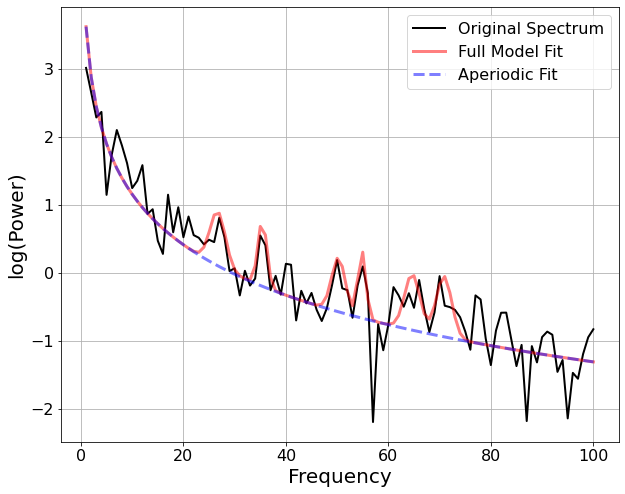

In [164]:
fm = fg.get_fooof(ind=51, regenerate=True)
fm.print_results()
fm.plot()